<a href="https://www.kaggle.com/code/jackhamilton45/finalproject-musicanalyzer?scriptVersionId=190537666" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Music Evolution Analysis

**By Jack Hamilton**

# Background:

Music has changed a great amount over the past few decades both sonically and lyrically. After WWII, the popularity of listening to the radio exploded and families would gather around the radio in the living room to listen to the news and music every night. The radio and jazz music of this time turned into a centrifugal force for family dynamics and facilitated great times and put everyone in a great mood. As time progressed into the 1950’s, the styles of popular music shifted away from slow jazz to a more upbeat jazz, rhythm and blues, and a Doo-Wop style of music. The style of popular music at a certain time period has to do with politics, technological advancements, and pop culture and current events that occur. Music kept evolving to be very political and mellow in the 60’s,  disco and popular rock in the 70’s, electronic and unserious music in the 80’s, grunge and alternative in the 90’s, indie rock and hip hop in the 2000’s, and dance pop and trap in the 2010’s. Today’s most popular music can be described as electronic pop and hip hop. The sounds of today are much different than they were seventy years ago. Music now uses electronics, synthesizers, and autotune, while music in the 50’s has a lot of acoustics, whistling, and accapela. There are many different elements that contribute to the differentiation between songs. The most notable characteristics that distinguish songs are : timbre, tempo, timbre, use of major and minor chords, lyric sentiment, the storage of each song, and the selection of instruments that are used. // put what the analyzer does right here
Timbre is how quality a sound or tone and what makes it distinct from other musical notes. This can be a good inceptor of differences between styles of music because places a numerical value on the sounds that we hear, so we can compare the differences between a brassy sound and a dull sound. Comparing the use of major to minor chords can be helpful in differentiating songs because they can be telling about the sentiment of the songs. Major chords tend to indicate happier, light, and more feel good songs, while minor chords tend to indicate more sad, heavy, and emotional songs. Comparing lyric sentiment is a major factor in comparing songs. I think it will be very interesting to see how both lyrics and sentiments have changed over time. I will also be comparing the storage (how much space each sound file takes up) to see how the amount of data being stored in each song has changed over time. I hypothesized that there would be a major difference in all categories the songs because of how much music has changed.

**Definitions:**

* Tempo: How fast paced or slow paced a song is (measured in Beats per Minute)

* Timbre: How unique the sounds in the song are (uniqueness of sound)

* Lyric Sentiment: The emotion that song lyrics envoke

* Chroma: The distribution of pitches across the frames of the song




**Top 10 Songs from 1953 (According to Billboard):**

* Mystery Train - Little Junior.mp3	
* LaVern Baker - Soul On Fire 2.mp3	
* Hank Williams Kaw-Liga 2.mp3
* THE ORIOLES - CRYING IN THE CHAPEL (1953) 2.mp3
* Money Honey Clyde McPhatter.mp3
* Flamingos - Golden Teardrops - 1953.mp3
* Big Mama Thornton - Hound Dog (1952) Blues 2.mp3
* Ray Charles - Mess Around 2.mp3
* Gee by the Crows 1954.mp3
* Ruth Brown - Hey Mama He Treats Your Daughter Mean (Live) 2.mp3

**Top 10 Songs from 2023 (According to Billboard):**

* SZA - Kill Bill (Audio).mp3
* Taylor Swift - Anti-Hero (Official Lyric Video).mp3
* Metro Boomin - Creepin (Lyrics) Feat. The Weeknd 21 Savage.mp3
* Morgan Wallen - Last Night (Lyrics).mp3
* Miley Cyrus - Flowers (Lyrics).mp3
* Sam Smith - Unholy (Lyrics) ft. Kim Petras.mp3
* David Guetta Bebe Rexha - Im Good (Blue).mp3
* The Weeknd Ariana Grande - Die For You (Official Audio).mp3
* Rema Selena Gomez - Calm Down (Lyrics).mp3
* Harry Styles - As It Was (Lyrics).mp3

# Description of Project:

For this project, I analyzed the differences of the top ten popular songs from 1953 have to the top ten popular songs from 2023. I first created 7 different segments of code that individually: 

* Tempo
* Timbre
* Major : Minor (ratio of Major to Minor chords)
* Lyric Sentiment
* Memory
* 3 Librosa Functions
* Total Score

I created five dendrograms for tempo, timbre, Major:Minor, lyric sentiment, and the total score. I decided to not do a dendrogram for the memory and librosa functions. I did not include duration and storage because I feel like they don't have a great impact on the differences between songs.  You can just eyeball the differences between the durations and also the storage. I analyzed Tempo because it is a good indicator of the most popular speeds of each song which the user can make inferences about what types of songs they are. I analyzed 

# Project:

Setup Right here (some info pulled from Dr. Ferrers Labs)

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import IPython.display as ipd
import librosa
from textblob import TextBlob
from typing import *
from scipy.spatial import distance
from scipy.cluster import hierarchy

import os
from IPython.display import display, Markdown

def assess(value: Any, expected: Any) -> bool:
    print(value)
    return value == expected

def float_assess(value: float, expected: float, tolerance: float) -> bool:
    print(value)
    return abs(value - expected) < tolerance

def show_markdown_table(headers: List[str], data: List) -> str:
    s = f"| {' | '.join(headers)} |\n| {' | '.join([(max(1, len(header) - 1)) * '-' + ':' for header in headers])} |\n"
    for row in data:
        s += f"| {' | '.join([str(item) for item in row])} |\n"
    display(Markdown(s))

In [2]:
def dendrogram_from(names: List[str], distances: List[List[float]], title: str) -> List[List[float]]:
    condensed = distance.squareform(distances)
    c = hierarchy.linkage(condensed, 'average')
    plt.figure(figsize=(4, 4))
    dn = hierarchy.dendrogram(c, labels = names, orientation="left")
    plt.title(f'UPGMA Clustering: {title}')
    plt.ylabel("Total Distance")
    plt.show()
    return c

def unzip(tuple_values):
    # From https://appdividend.com/2020/10/19/how-to-unzip-list-of-tuples-in-python/#:~:text=%20How%20to%20Unzip%20List%20of%20Tuples%20in,zip...%204%202%3A%20Using%20List%20Comprehension%20More%20
    return tuple(zip(*tuple_values))
    
def cluster(data: List[Tuple[str, float]], title: str, distance_func):
    names, _ = unzip(data)
    distances = [[distance_func(a[1], b[1]) for a in data] for b in data]
    dendrogram_from(names, distances, title)
    
def float_distance(f1: float, f2: float) -> float:
    subtract = abs(f1 - f2)
    return subtract

In [3]:
#Major/minor count setup

row2note = ['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B']
TEMPERLEY_C_MAJOR = [5.0, 2.0, 3.5, 2.0, 4.5, 4.0, 2.0, 4.5, 2.0, 3.5, 1.5, 4.0]
TEMPERLEY_C_MINOR = [5.0, 2.0, 3.5, 4.5, 2.0, 4.0, 2.0, 4.5, 3.5, 2.0, 1.5, 4.0]
NUM_NOTES = len(row2note)

major = np.ndarray((NUM_NOTES, NUM_NOTES))
minor = np.ndarray((NUM_NOTES, NUM_NOTES))
for i in range(NUM_NOTES):
    for j in range(NUM_NOTES):
        offset = (i - j) % NUM_NOTES
        major[j][i] = TEMPERLEY_C_MAJOR[offset]
        minor[j][i] = TEMPERLEY_C_MINOR[offset]

def best_row_for(sample: np.ndarray, modality_table: np.ndarray) -> tuple:
    best_row_index = 0
    best_dot_product = np.dot(sample, modality_table[0])
    
    for i, row in enumerate(modality_table[1:], start=1):
        dot_product = np.dot(sample, row)
        if dot_product > best_dot_product:
            best_dot_product= dot_product
            best_row_index = i
    return best_row_index, best_dot_product

def best_modality_for(sample: np.ndarray) -> tuple:
    majorCount, major_dot_product = best_row_for(sample, major)
    minorCount, minor_dot_product = best_row_for(sample, minor)
    
    if major_dot_product > minor_dot_product:
        return row2note[majorCount], "Major"
    else:
        return row2note[minorCount], "Minor"

In [4]:
#1953
dirOldAud = "/kaggle/input/top-10-songs-from-1953"
musicOld = {oldFilename: librosa.load(f"{dirOldAud}/{oldFilename}") for oldFilename in os.listdir(dirOldAud)}

#2023
dirNewAud = "/kaggle/input/top-songs-from-2023"
musicNew = {newFilename: librosa.load(f"{dirNewAud}/{newFilename}") for newFilename in os.listdir(dirNewAud)}

audioOld_files = sorted(os.listdir(dirOldAud))
audioNew_files = sorted(os.listdir(dirNewAud))

music_files = {}
music_files.update(musicOld)
music_files.update(musicNew)


Here is the analyzer for tempo: analyze the tempo, timbre, use of major and minor chords, lyric sentiment, the storage of each song, and possibly instruments used


# Tempo Analysis

In [5]:


#Finds tempo of both data sets (adjust project 9)
def tempo_list_from(music_files: Dict[str,Tuple[np.ndarray, float]]) -> List[Tuple[str,float]]:
    data = []
    for filename, (audio_data, sr) in music_files.items():
        tempo = librosa.beat.tempo(y=audio_data, sr=sr)[0]
        data.append((filename, tempo)) 
                   
    finalTempo = sorted(data, key=lambda x: x[1])
    return finalTempo

tempo_list_old = tempo_list_from(musicOld)
tempo_list_new = tempo_list_from(musicNew)

#Average
old_ave = sum(tempo for _, tempo in tempo_list_old)/10
new_ave = sum(tempo for _, tempo in tempo_list_new)/10


#Markdown
%time music_tempos = tempo_list_from(music_files)
tempo_display = "| Audio Files | Tempo (Beats Per Minute) |\n|-------------|---------------------------|\n"
for filename, tempo in tempo_list_old:
    tempo_display += f"| {filename} | {tempo} |\n"
for filename, tempo in tempo_list_new:
    tempo_display += f"| {filename} | {tempo} |\n"
    
print(f" The average tempo for the top songs in 1953 is {old_ave}!")
print(f" The average tempo for the top songs in 2023 is {new_ave}!")
Markdown(tempo_display)

/tmp/ipykernel_17/1863042292.py:5: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=audio_data, sr=sr)[0]


CPU times: user 29.7 s, sys: 5.83 s, total: 35.5 s
Wall time: 27.4 s
 The average tempo for the top songs in 1953 is 132.03276729339834!
 The average tempo for the top songs in 2023 is 121.52211867646872!


| Audio Files | Tempo (Beats Per Minute) |
|-------------|---------------------------|
| Mystery Train - Little Junior.mp3 | 95.703125 |
| LaVern Baker - Soul On Fire 2.mp3 | 107.666015625 |
| Hank Williams Kaw-Liga 2.mp3 | 112.34714673913044 |
| THE ORIOLES - CRYING IN THE CHAPEL  (1953) 2.mp3 | 123.046875 |
| Money Honey Clyde McPhatter.mp3 | 123.046875 |
| Flamingos - Golden Teardrops - 1953.mp3 | 129.19921875 |
| Big Mama Thornton - Hound Dog (1952) Blues 2.mp3 | 143.5546875 |
| Ray Charles - Mess Around 2.mp3 | 151.99908088235293 |
| Gee by the Crows 1954.mp3 | 161.4990234375 |
| Ruth Brown - Hey Mama He Treats Your Daughter Mean (Live) 2.mp3 | 172.265625 |
| SZA - Kill Bill (Audio).mp3 | 89.10290948275862 |
| Taylor Swift - Anti-Hero (Official Lyric Video).mp3 | 95.703125 |
| Metro Boomin - Creepin (Lyrics) Feat. The Weeknd 21 Savage.mp3 | 99.38401442307692 |
| Morgan Wallen - Last Night (Lyrics).mp3 | 103.359375 |
| Miley Cyrus - Flowers (Lyrics).mp3 | 117.45383522727273 |
| Sam Smith - Unholy (Lyrics) ft. Kim Petras.mp3 | 129.19921875 |
| David Guetta Bebe Rexha - Im Good (Blue).mp3 | 129.19921875 |
| The Weeknd Ariana Grande - Die For You (Official Audio).mp3 | 135.99917763157896 |
| Rema Selena Gomez - Calm Down (Lyrics).mp3 | 143.5546875 |
| Harry Styles - As It Was (Lyrics).mp3 | 172.265625 |


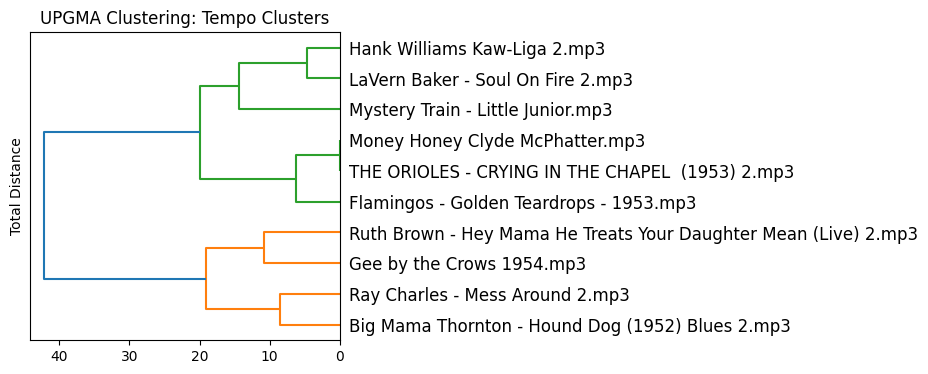

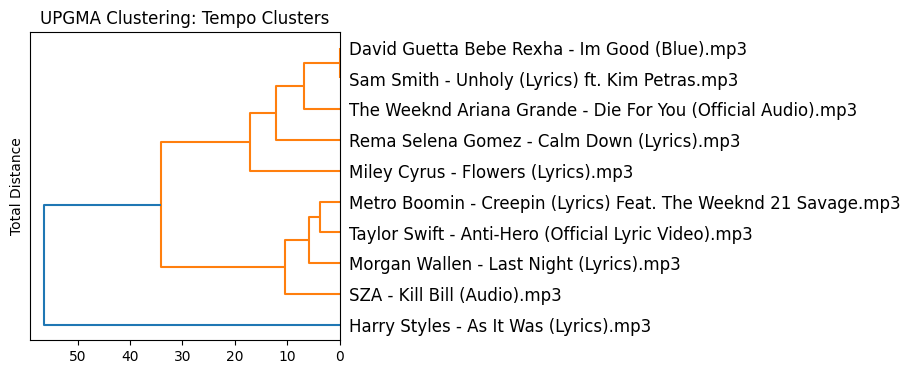

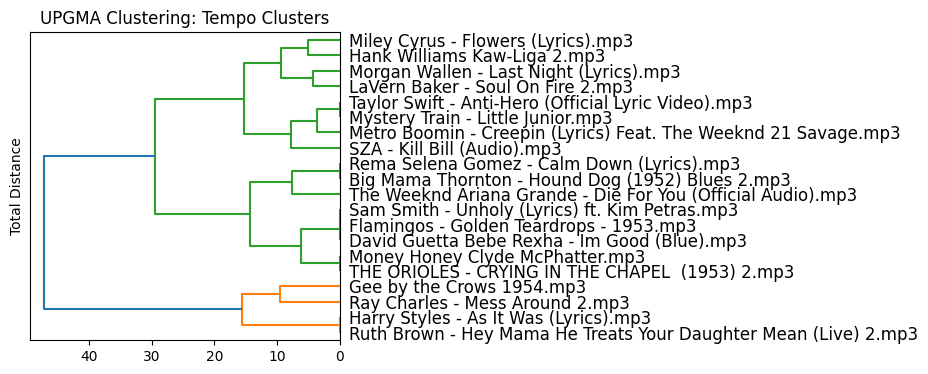

In [6]:
cluster(tempo_list_old, "Tempo Clusters", float_distance)
cluster(tempo_list_new, "Tempo Clusters", float_distance)
#combine the two
combined_tempo_list = tempo_list_old + tempo_list_new
cluster(combined_tempo_list, "Tempo Clusters", float_distance)

**Tempo Old:** I was a bit shocked by the tempo of the top songs from 1953. I thought the songs would be a lot slower, but actually they are very upbeat, fast paced, swing music. When listening to the songs before I conducted the test I believed that most of the tempos would be under 140 BPM, but only 6 of the 10 songs followed this trend. Starting off the list with the slowest tempo was "Mystery Train" by Little Junior Parker. "Mystery Train" got rated with a 95.7 for it's tempo, which I completely agree with to be accurate because of it is slow, easy going jazz that I would imagine my grandparents listening to. Lavern Baker's "Soul On Fire" was rated at a slow 107.67 BPM which I completely agree with becuase this is a song that you slow jazz song that you slow dance to. Hank William's "Kaw Liga is the first country song we have seen in the 1953 list and it was rated at 112.35 BPM. I would agree with this because the background music is relatively slow and folky even though Hank Williams is singing fast at some points in the song. The tempo for "Crying in the Chapel" by the Orioles is not what I think it should be. It was rated at 123.05 BPM by Librosa, but I feel like this is the slowest song in both data sets. Clyde McPhatter's "Money Honey" was rated accurately at 123.05 BPM. It started off very slow but the beat and vocals picked up to be a decently energetic swing jazz song. The Flamingo's "Golden Teardrops" was rated at 129.2 BPM which I believe is inaccurate. It is way slower than other songs in the 1953 list and is a slow jazz song that I feel like had it's tempo overestimated. Big Mama Thornton's "Hound Dog" is rated at 143.55 BPM for it's and I completely agree with this. This is the first song in the 1953 data set that breaks the 140 BPM threshold I was talking about and it is rightfully so becuase this is an upbeat, energetic, sassy jazz song. Ray Charles' "Mess Around" is rated at 152 BPM which is very accurate because it is a fast paced jazz song that utilized piano and the saxophone to facilitate the fast cadence of the song. The Crows' "Gee" was rated at 161.5 BPM, which I would disagree with it because it is definitely a slower song than "Mess around" and "Hound Dog" and is just a standard Do-Wop song. Ruth Brown's "Hey Mama He Treats Your Daughter Mean" is rated at 172.27 BPM which I would kind of agree with, but not 100%. It is a face paced jazz song and I think it should have a really high rating, but I think "Mess Around" should be higher and I think 172.27 BPM is an overestimation of the the tempo. The top ten songs from 1953 had an overall tempo average of 132.03 BPM.

**Tempo New:** I thought the tempo for the top songs of 2023 would be much higher than they were. Sza's "Kill Bill" is rated at 89.1 BPM  which is accurate because it is a slow song, but it is a different kind of slow than the songs from 1953. Taylor Swift's "Anti-Hero" is rated at 95.7 BPM, which I would agree with completely because it is a slow, casual, and sentimental song. Metro Boomin and the Weeknd's "Creepin" was rated at 99.25 BPM which I would agree with because it is slow at some points of the song, but ultimately it is still on the slow end, but faster than the one's rated below it. Morgan Wallen's "Last Night" is rated at 103.36 BPM and this is accurately rated because it's a decently fast country song, faster than the songs below it. Miley Cyrus' "Flowers" was rated at 117.45 BPM which is very accurate because it is an upbeat pop song, so I believe it was scored fairly. Sam Smith's "Unholy" was rated at 129.2 BPM which I am a little surprised by because I thought it would have a lower slower tempo. David Guetta and Bebe Rexha's "I'm Good" is rated at 129.2 BPM as well which I believe is accurate, but it is shocking that it is the same score as "Unholy" because I think it should be way faster. The Weeknd and Ariana Grande's "Die for You" was rated at 136 BPM which I think is a little off. There is background snare that is upbeat, but the rest of the percussion and beat is very slow tempo, so I think it's a little off. Rema and Selena Gomez's "Calm Down" was rated 143.55 BPM which is very accurate because it is an upbeat pop song that has a fast beat. Harry Styles "As it Was" was rated 172.27 BPM which I think is a little off. It is definitely an upbeat song, but to have it 30 BPM over the second highest BPM song is crazy to me. The top ten songs from 2023 had an overall tempo average of 121.52 BPM.

**Tempo Overall:** I was shocked that the songs from 1953 had a higher tempo average than the songs from 2023. I thought it would be the opposite, but the 1953 songs had 10 BPM higher than the 2023 songs.

# Timbre Analysis:

In [7]:
def mfcc_counts_from(music_files: Dict[str, Tuple[np.ndarray, float]]) -> List[Tuple[str, float]]:
    counts = []
    for filename, (y, sr) in music_files.items():
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        coefficient_count = mfcc.shape[1]
        counts.append((filename, coefficient_count))
    counts_sort = sorted(counts, key=lambda x: x[1])
    return counts_sort

music_timbre_old = mfcc_counts_from(musicOld)
music_timbre_new = mfcc_counts_from(musicNew)

#Average
old_aveM = sum(mfcc for _, mfcc in music_timbre_old)/10
new_aveM = sum(mfcc for _, mfcc in music_timbre_new)/10

#Markdown
mfcc_display = "| Audio Files | # MFCC Coefficients |\n|-------------|----------------------|\n"
for filename, coefficient_count in music_timbre_old:
    mfcc_display += f"| {filename} | {coefficient_count} |\n"
for filename, coefficient_count in music_timbre_new:
    mfcc_display += f"| {filename} | {coefficient_count} |\n"

    
print(f" The average timbre (MFCC) for the top songs in 1953 is {old_aveM}!")
print(f" The average timbre (MFCC) the top songs in 2023 is {new_aveM}!")
Markdown(mfcc_display)




 The average timbre (MFCC) for the top songs in 1953 is 7068.9!
 The average timbre (MFCC) the top songs in 2023 is 8218.9!


| Audio Files | # MFCC Coefficients |
|-------------|----------------------|
| Ruth Brown - Hey Mama He Treats Your Daughter Mean (Live) 2.mp3 | 5212 |
| Gee by the Crows 1954.mp3 | 5756 |
| Mystery Train - Little Junior.mp3 | 6247 |
| Ray Charles - Mess Around 2.mp3 | 7003 |
| Hank Williams Kaw-Liga 2.mp3 | 7106 |
| Big Mama Thornton - Hound Dog (1952) Blues 2.mp3 | 7336 |
| Money Honey Clyde McPhatter.mp3 | 7632 |
| LaVern Baker - Soul On Fire 2.mp3 | 7891 |
| THE ORIOLES - CRYING IN THE CHAPEL  (1953) 2.mp3 | 7942 |
| Flamingos - Golden Teardrops - 1953.mp3 | 8564 |
| SZA - Kill Bill (Audio).mp3 | 6698 |
| Sam Smith - Unholy (Lyrics) ft. Kim Petras.mp3 | 6720 |
| Harry Styles - As It Was (Lyrics).mp3 | 7041 |
| Morgan Wallen - Last Night (Lyrics).mp3 | 7063 |
| David Guetta Bebe Rexha - Im Good (Blue).mp3 | 7605 |
| Miley Cyrus - Flowers (Lyrics).mp3 | 8517 |
| Taylor Swift - Anti-Hero (Official Lyric Video).mp3 | 8772 |
| Metro Boomin - Creepin (Lyrics) Feat. The Weeknd 21 Savage.mp3 | 9563 |
| The Weeknd Ariana Grande - Die For You (Official Audio).mp3 | 10032 |
| Rema Selena Gomez - Calm Down (Lyrics).mp3 | 10178 |


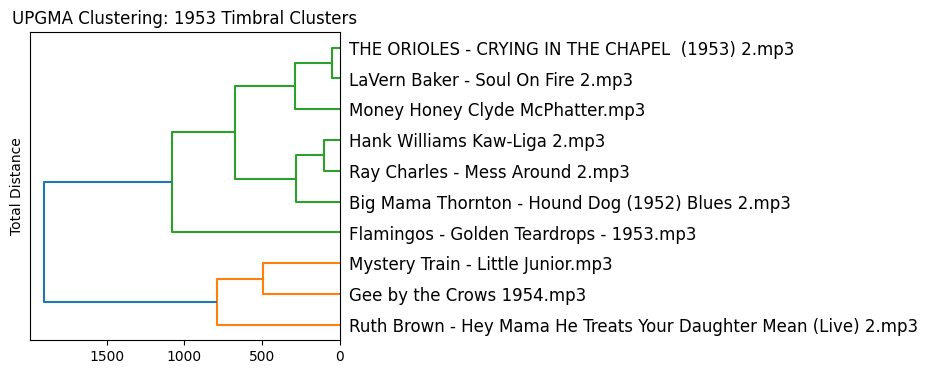

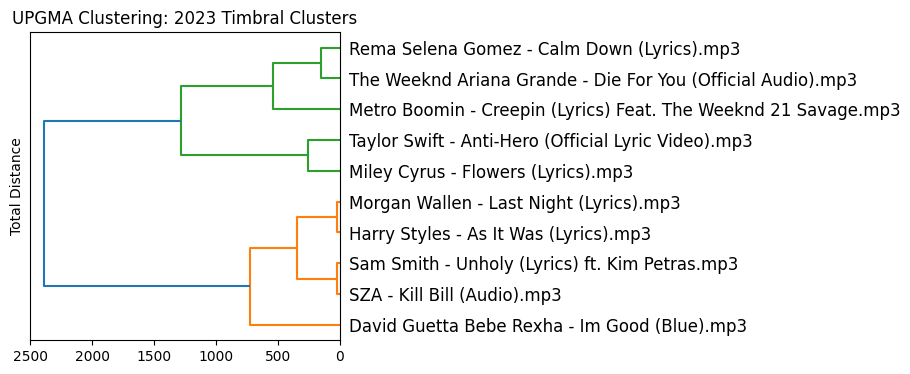

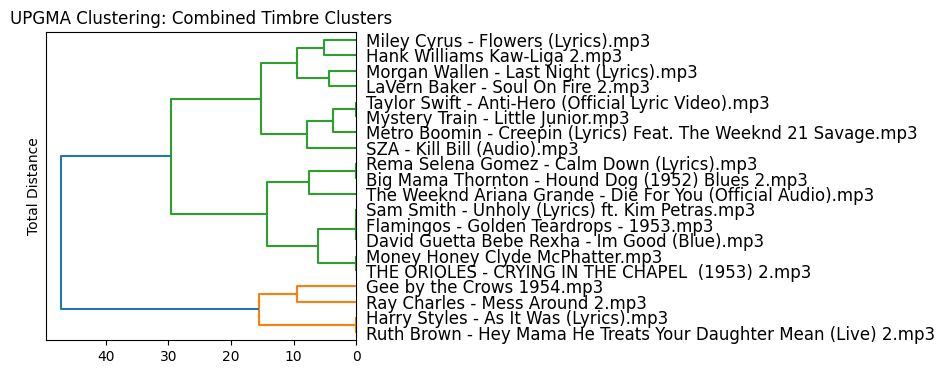

In [8]:
cluster(music_timbre_old, "1953 Timbral Clusters", float_distance)
cluster(music_timbre_new, "2023 Timbral Clusters", float_distance)

combined_timbre_list = music_timbre_old + music_timbre_new
cluster(combined_tempo_list, "Combined Timbre Clusters", float_distance)

**Timbre for Old Songs:** This is exactly how I expected the timbre to be with the older songs having a lower score because they didn't have technology, synthesizers, or autotune to create weird noised in the songs. Ruth Brown's "Hey Mama He Treats Your Daughter Mean" is rated at the lowest timbre of 5212 MFCC counts which I would completely agree with because the instrumentals are about as basic as you can get, it sounds like only a tamborine, saxophone, and Ruth Brown's voice. The Crows' "Gee" had the second to lowest timbre count rated at 5756 MFCC count which I would also completely agree with because it is mostly acapella and maybe a piano in the background, very basic doo-wop song. "Mystery Train" by Little Junior Parker got rated with a 6247 MFCC Count which is accurate because we are starting to add more instruments and pick up complexity of sounds in the data set. Ray Charles' "Mess Around" is rated at 7003 MFCC count which I was surprised with at first, but then I realized that the only instruments being played were a piano and saxophone. The song sounds more complex than it actually is. Hank William's "Kaw Liga was rated at 7106 which I would agree with because the instruments continue to advance with a violin, fide, or some sort of string instrument that creates some peculiar sounds. Big Mama Thornton's "Hound Dog" is rated at 7336 MFCC count for it's and I completely agree with this. It is an advancement from the other songs and utilizes some funky saxophone and other jazz instruments. Clyde McPhatter's "Money Honey" was rated accurately at 7632 for it's MFCC count because it uses some interesting sounds that would list it as unique.Lavern Baker's "Soul On Fire" was rated at a high 7891 MFCC count which I somewhat agree with, but I just thought it was fast paced  of basic instruments, so I wouldn't have rated it as high. The timbre for "Crying in the Chapel" by the Orioles was rated at 7942 MFCC count which I was very surprised by and might disagree with because I do not hear many unique sounds in the song. Finally, The Flamingo's "Golden Teardrops" was rated at 8564 MFCC counts which is astronomically higher than the other and I believe this is accurate because there are a lot of peculiar noises being played. The top ten songs from 1953 had an overall timbre average of 7068.9 MFCC count.



    

**Timbre for New Songs:**
There weren't too many surprises when referring to the timbre of the top songs from 2023. Sza's "Kill Bill" is again rated the lowest at 6698 MFCC which I would disagree with because there is an extraterrestrial sort of whistle going on in the background the entire time, so I thought it would have been higher. Sam Smith's "Unholy" was rated at 6720 MFCC Count which I think is accurate because there aren't too many weird instruments, other than a weird bass sound. Harry Styles "As it Was" was rated 7041 MFCC count which I think is a little off because it is just a keyboard, percussion, and vocals with no crazy sounds being displayed. Morgan Wallen's "Last Night" is rated at 7063 MFCC count and this is accurately rated because there are some weird twangs in the instruments to make it country, but they also are not usual sounds. David Guetta and Bebe Rexha's "I'm Good" is rated at 7605 MFCC, which passes the average for songs in 1953. I agree with this rating because there are a lot of computer generated sounds in this song that would give it a high rating. Miley Cyrus' "Flowers" was rated at 8517 BPM there is a lot of computer synthesized background music that is possibly a keyboard, but it is definitely a unique sound. Taylor Swift's "Anti-Hero" is rated at 8772 MFCC, which I would agree with because there is a lot of computer generated sounds in here and also maybe autotune which might have an impact on the timbre. This song has a higher timbre than all of the songs in the 1953 data set, which shows the difference between the two data sets. Metro Boomin and the Weeknd's "Creepin" was rated at 9563 MFCC which I would agree with the score because it is synthesized background of a remix from the 2000's which is pretty cool. The Weeknd and Ariana Grande's "Die for You" was rated at 10032 MFCC count which I think is accurate because there is a synthesized background that creates some unqiue sounds Rema and Selena Gomez's "Calm Down" was rated the highest at 10178 MFCC count which is I was a little surprised by becasuse it is pretty basic. There is a lot of electronics and autotune used in the song, but I feel like it should have a lower score.The top ten songs from 2023 had an overall timbre average of 8218.9 MFCC count.

**Timbre Overall:** I was not surprised at all that the songs from 2023 had a higher timbre average than the songs from 1953. Music technology has adapted a lot since the 1950's to include more autotune, synthesizers, and computer generated instrument, so it is no surpris that the songs today have a higher timbre.

# Major/Minor Aanlysis:

In [9]:


def major_minor_count(y: np.ndarray, sr: float) -> tuple:
    major_count = 0
    minor_count = 0
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
    chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
    chromagram_transposed = chromagram.transpose()
    duration = librosa.get_duration(y=y, sr=sr)
    current_frame = 0
    current_notes = np.zeros(chromagram_transposed.shape[1])
    
    for r, sample in enumerate(chromagram_transposed):
        current_notes += sample
        if current_frame < len(beat_frames) and r > beat_frames[current_frame]:
            current_time = current_frame * duration / len(beat_frames)
            best_note, modality = best_modality_for(current_notes)
            
            if modality == "Major":
                major_count += 1
            else:
                minor_count += 1
                
            current_notes = np.zeros(chromagram_transposed.shape[1])
            current_frame += 1
    
    final = major_count/minor_count
    return major_count, minor_count, final

#markdown is not working. try a function
def majorminor_markdown_table(directory: str) -> str:
    table = "| Song | Major Count | Minor Count | Minor : Major |\n"
    table += "|------|-------------|-------------|---------------|\n"
    
    for filename in os.listdir(directory):
        y, sr = librosa.load(os.path.join(directory, filename))
        major_count, minor_count, ratio = major_minor_count(y, sr)
        table += f"| {filename} | {major_count} | {minor_count} | {ratio:.2f} |\n"
    
    return table

print("1953 Major-Minor Analysis")
Markdown(majorminor_markdown_table(dirOldAud))


1953 Major-Minor Analysis


| Song | Major Count | Minor Count | Minor : Major |
|------|-------------|-------------|---------------|
| Ruth Brown - Hey Mama He Treats Your Daughter Mean (Live) 2.mp3 | 168 | 173 | 0.97 |
| Mystery Train - Little Junior.mp3 | 235 | 210 | 1.12 |
| THE ORIOLES - CRYING IN THE CHAPEL  (1953) 2.mp3 | 201 | 135 | 1.49 |
| Big Mama Thornton - Hound Dog (1952) Blues 2.mp3 | 213 | 187 | 1.14 |
| Ray Charles - Mess Around 2.mp3 | 214 | 170 | 1.26 |
| Hank Williams Kaw-Liga 2.mp3 | 183 | 96 | 1.91 |
| Gee by the Crows 1954.mp3 | 178 | 173 | 1.03 |
| LaVern Baker - Soul On Fire 2.mp3 | 139 | 166 | 0.84 |
| Flamingos - Golden Teardrops - 1953.mp3 | 145 | 156 | 0.93 |
| Money Honey Clyde McPhatter.mp3 | 204 | 154 | 1.32 |


In [10]:
print("2023 Major-Minor Analysis")
Markdown(majorminor_markdown_table(dirNewAud))

2023 Major-Minor Analysis


| Song | Major Count | Minor Count | Minor : Major |
|------|-------------|-------------|---------------|
| Sam Smith - Unholy (Lyrics) ft. Kim Petras.mp3 | 181 | 153 | 1.18 |
| Miley Cyrus - Flowers (Lyrics).mp3 | 207 | 175 | 1.18 |
| Metro Boomin - Creepin (Lyrics) Feat. The Weeknd 21 Savage.mp3 | 169 | 182 | 0.93 |
| Rema Selena Gomez - Calm Down (Lyrics).mp3 | 301 | 252 | 1.19 |
| Harry Styles - As It Was (Lyrics).mp3 | 221 | 241 | 0.92 |
| Taylor Swift - Anti-Hero (Official Lyric Video).mp3 | 184 | 127 | 1.45 |
| SZA - Kill Bill (Audio).mp3 | 126 | 97 | 1.30 |
| Morgan Wallen - Last Night (Lyrics).mp3 | 198 | 71 | 2.79 |
| The Weeknd Ariana Grande - Die For You (Official Audio).mp3 | 97 | 156 | 0.62 |
| David Guetta Bebe Rexha - Im Good (Blue).mp3 | 219 | 143 | 1.53 |


**Major/Minor Old Songs:** 

Ruth Brown's "Hey Mama He Treats Your Daughter Mean" is rated at .97 for major to minor comparison which shows that there is almost equal realationship between the two. "Mystery Train" by Little Junior Parker got rated with a 1.12 which is accurate and means that there are more major chords than minor chords. The major-minor for "Crying in the Chapel" by the Orioles was rated at 1.49 which is the highest major heavy songs of the old data set and is an accurate rating. Big Mama Thornton's "Hound Dog" is accurately rated at 1.14, so it is still major heavy, but not too crazy. Ray Charles' "Mess Around" is rated at 1.26 which is accurate because it's a very positive note heavy song. Hank William's "Kaw Liga was rated at 1.91 was pretty surprised by because I thought it would be minor-heavy. The Crows' "Gee" had the second to lowest timbre count 1.03 which I would also completely agree with because it seems like it is very balanced, but leaning towards major. Lavern Baker's "Soul On Fire" was rated at a low .81 which is the lowest score in the old songs data set. I would agree with this because it is a sadder song. The Flamingo's "Golden Teardrops" was rated at .93 is accurate because it is a slow, sad song. Finally, Clyde McPhatter's "Money Honey" was rated accurately at 1.32 because it is very ecstatic and happy beat so I would expect high majors. The top ten songs from 1953 had an overall major-minor average of 1.2.

**Major/Minor New Songs:** 

There is definitely more variation in this data set than there was in the old music data set. Sam Smith's "Unholy" was rated at 1.18 which I would agree with because there is a lot of "happier" soundss in the background. Miley Cyrus' "Flowers" surprisingly had the same score of 1.18. It's not surpising that major chords prevail, I just think it's werid that these two songs have the same rating. Metro Boomin and the Weeknd's "Creepin" was rated at .93 which is very accurate because it is a sadder song that seems minor-heavy.Rema and Selena Gomez's "Calm Down" was rated the highest at 1.19 which is accurate because there are a lot of positive notes throughout the song. Harry Styles "As it Was" was rated .92 which is a good score because it is a sad song reminiscing on the past so it is understandable why it is minor heavy. Taylor Swift's "Anti-Hero" is rated at 1.45 which I was shocked with at first because it is kind of a negative song, but I went back and listened to it again and the background notes are mostly major so it checks out. Sza's "Kill Bill" is again rated 1.3 which is a fair score because the background music is elated and floaty. Morgan Wallen's "Last Night" has a through the roof rating of 2.79 which is really surprising that it is so much higher than all of the others. I am guessing that there are barely in minor counts in here. The Weeknd and Ariana Grande's "Die for You" was rated at .62, which is the lowest ratio in both data sets. I knew it would minor heavy, but I didn't think it would be this low. David Guetta and Bebe Rexha's "I'm Good" is rated at 1.53 which is what I expected for a postive and happy song.The top ten songs from 2023 had an major average of 1.31.

# Lyric Sentiment Analyzer:

In [11]:

def lyrics_sentiment(directory: str) -> List[Tuple[str, float]]:
    sentiment_scores = []
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            with open(os.path.join(directory, filename), "r", encoding="utf-8") as file:
                lyrics = file.read()
                blob = TextBlob(lyrics)
                sentiment_score = blob.sentiment.polarity
                sentiment_scores.append((filename, sentiment_score))
    return sentiment_scores

dirOldLyr = "/kaggle/input/lyrics-of-top-songs-from-1953"
lyric_sentiments_old = lyrics_sentiment(dirOldLyr)

dirNewLyr = "/kaggle/input/lyrics-of-top-songs-from-2023"
lyric_sentiments_new = lyrics_sentiment(dirNewLyr)


# Markdown
sentiment_display = "| Songs | Sentiment Score |\n|-------------|-----------------|\n"
for filename, sentiment_score in lyric_sentiments_old:
    sentiment_display += f"| {filename} | {sentiment_score} |\n"
for filename, sentiment_score in lyric_sentiments_new:
    sentiment_display += f"| {filename} | {sentiment_score} |\n"

old_ave_sentiment = sum(score for _, score in lyric_sentiments_old) / 10
new_ave_sentiment = sum(score for _, score in lyric_sentiments_new) / 10

print(f"The average sentiment rating for the top songs in 1953 is {old_ave_sentiment}!")
print(f"The average sentiment rating for the top songs in 2023 is {new_ave_sentiment}!")
Markdown(sentiment_display)

The average sentiment rating for the top songs in 1953 is 0.033826710734798995!
The average sentiment rating for the top songs in 2023 is 0.19186265267966318!


| Songs | Sentiment Score |
|-------------|-----------------|
| Soul-On-Fire-Baker-lyrics.txt | 0.1744212962962963 |
| Gee-TheCrows-lyrics.txt | 0.5 |
| Money-Honey-McPhatter-lyrics.txt | 0.05104166666666667 |
| CryingInChapel-Orioles-lyrics.txt | 0.31665223665223674 |
| MysteryTrain-Junior-lyrics.txt | -0.14805555555555555 |
| GoldenTeardrops-flamingos-lyrics.txt | 0.14875992063492063 |
| HeTreatsMean-Brown-lyrics.txt | -0.3595588235294117 |
| MessAround-Charles-lyrics.txt | -0.13787878787878785 |
| HoundDog-BigMama-lyrics.txt | -0.12476190476190475 |
| Kaw-Liga-Williams-lyrics.txt | -0.08235294117647059 |
| ImGood-GuettaRexha-lyrics.txt | 0.5011904761904761 |
| KillBill-Sza-lyrics.txt | 0.20947966507177032 |
| Unholy-Smith-lyrics.txt | 0.12375478927203064 |
| Creepin-Weeknd-lyrics.txt | 0.21171874999999998 |
| CalmDown-Gomez-lyrics.txt | 0.11588541666666669 |
| Lastnight-Wallen-lyrics.txt | 0.046473214285714284 |
| AsItWas-Styles-lyrics.txt | 0.05384615384615384 |
| Flowers-Cyrus-lyrics.txt | 0.48599439775910364 |
| AntiHero-Swift-lyrics.txt | 0.0393939393939394 |
| DieForYou-WeekndGrande-lyrics.txt | 0.13088972431077694 |


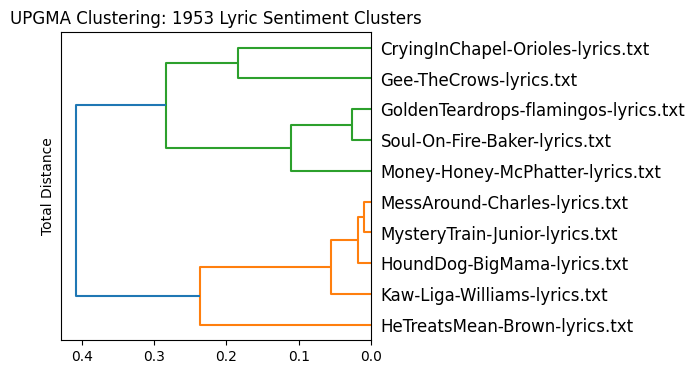

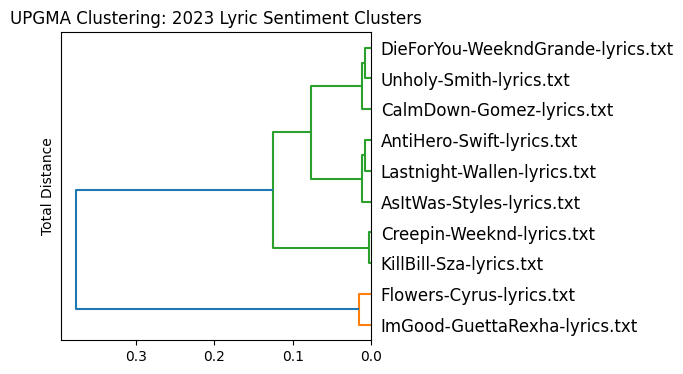

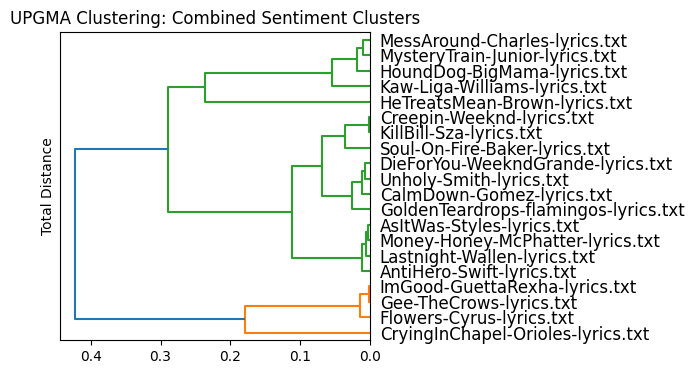

In [12]:
cluster(lyric_sentiments_old, "1953 Lyric Sentiment Clusters", float_distance)
cluster(lyric_sentiments_new, "2023 Lyric Sentiment Clusters", float_distance)

combined_sentiment_list = lyric_sentiments_old + lyric_sentiments_new
cluster(combined_sentiment_list, "Combined Sentiment Clusters", float_distance)

**Lyric Sentiment for Old Songs:**  Ruth Brown's "Hey Mama He Treats Your Daughter Mean" is rated at -.36 sentiment which is accurate because it is a negative song about treating a ex boyfirend being mean to someone's daughter ("He's the mean, meanest man I've ever seen"). The Crows' "Gee" had a sentiment score of .5 which  which I would also completely agree with because it is a song about being in love with a girl ("Why I love that girl, love that girl"). "Mystery Train" by Little Junior Parker got rated with a -.15 for lyric sentiment  which is accurate because it is about how a man's woman is leaving on a train ("Just bring my baby back"). Ray Charles' "Mess Around" is rated at -.14 sentiment for the lyrics which is inaccurate because my lyric analyzer misinterpreted what mess around meant. My. analyzer gave "mess around" a negative meaning when it means to dance and have fun ("Everybody do the mess around"). Hank William's "Kaw Liga" was rated at -.08 for lyric sentiment which I would agree with because the song is talking about the statue of the native who they felt bad for because he was lonely("Poor ol' Kaw-Liga, he never got a kiss"). Big Mama Thornton's "Hound Dog" is rated at -.13 lyric sentiment and is accurately rated because it is about a sad woman who is escaping her pimp ("You made me weep and moan"). Clyde McPhatter's "Money Honey" was rated accurately at .05 for lyric sentiment because it is a pretty neutral song about prioritizing money over love which is pretty neutral sentiment ("If you wanna get along well, make some money"). Lavern Baker's "Soul On Fire" was rated at .17 for lyric sentiment, which I somewhat agree with, but I think it should be a little more negative because it is saying goodbye to someone you love ("Well no more heart aches, no more heart breaks"). The timbre for "Crying in the Chapel" by the Orioles was rated at .32 for lyric sentiment which I was very surprised by at first but then I realized the song was about being said and then being optimistic that things will get better and realized the scoring was correct ("Then your burdens will be lighter"). Finally, The Flamingo's "Golden Teardrops" was rated at .15 for lyric sentiment which I would disagree with because it is a song about losing a girl and should be way more negative ("You haunt my memories"). The top ten songs from 1953 had an overall lyric sentiment score average of .034 which is pretty neutral.



    

**Lyric Sentiment for New Songs:**
Sza's "Kill Bill" was rated with a .21 lyric sentiment whe which I would disagree with because the song is about killing her ex and his new girlfriend which should be rated as negative ("Uh, I just killed my ex"). Sam Smith's "Unholy" was rated at .12 lyric sentiment which I strongly disagree because I think it is about cheating in a relationship ("Mummy don't know daddy's getting hot At the body shop, doin' somethin' unholy"). Harry Styles "As it Was" was rated .05 for lyric sentiment which I would disagree with because I think it is a negative song about reminiscing what he had in the past ("You know it's not the same as it was"). Morgan Wallen's "Last Night" is rated at .046 for lyric sentiment which I would kind of agree with, but I think it should have a higher rating because it is talking about his good times with a girl ("I wouldn't trade your kind of love for nothin' else"). David Guetta and Bebe Rexha's "I'm Good" is rated at .5 for lyric sentimen, which is very high and I would agree with this because it is a happy song about feeling great ("I'ma have the best f---ing night of my life"). Miley Cyrus' "Flowers" was accurately rated at .49 for lyric sentiment because it is a positive song where she says she doesn't need a boyfriend and is very optimistic ("Yeah, I can love me better than you can"). Taylor Swift's "Anti-Hero" is rated at .04 lyric sentiment which I feel is not quite rated accurately. The song talks about how she is an outcast and doesn't fit in so I feel like that's a more negative sentiment ("And I'm a monster on the hill"). Metro Boomin and the Weeknd's "Creepin" was rated at .21 for lyric sentiment which is an absolute miss from my analyzer. This song is about getting cheated on and not wanting to know so that is not positive at all ("If you creeping just don't let me find out"). The Weeknd and Ariana Grande's "Die for You" was rated at .13  MFCC count which I would agree with because it is mostly neutral, but a little positive talking about the person they llove and what they would do for them ("I would die for you"). Rema and Selena Gomez's "Calm Down" was rated the at .12 lyric sentiment which I would agree with because it is mostly neutral with hints of positivity (" Girl, you sweet like Fanta")The top ten songs from 2023 had an overall lyric sentiment score average of .19.

**Lyric Sentiment Overall:** I am not really surprised that today's songs have a lower sentiment than the songs in 1953 because songs today are very loose with what goes in them.






# Memory of Each Song:

In [13]:
dirNewAud = "/kaggle/input/top-songs-from-2023"
musicNew = {newFilename: librosa.load(f"{dirNewAud}/{newFilename}") for newFilename in os.listdir(dirNewAud)}
audioNew_files = sorted(os.listdir(dirNewAud))



def storage(music_files: Dict[str,Tuple[np.ndarray, float]], dir_path: str) -> List[Tuple[str,float]]:
    data = []
    for filename, (audio_data, sr) in music_files.items():
        full_path = os.path.join(dir_path, filename) 
        duration = librosa.get_duration(filename=full_path)
        storage_size = os.path.getsize(full_path) 
        if storage_size != 0:
            data.append((filename, storage_size, duration)) 
                   
    finalStorage = sorted(data, key=lambda x: x[1])
    return finalStorage


storage_list_old = storage(musicOld, dirOldAud)
storage_list_new = storage(musicNew, dirNewAud)



old_aveS = sum(storage for _, storage, _ in storage_list_old) / 10000000
new_aveS = sum(storage for _, storage, _ in storage_list_new) / 10000000

old_ave_duration = sum(duration for _, _, duration in storage_list_old) / 10
new_ave_duration = sum(duration for _, _, duration in storage_list_new) / 10

storage_display = "| Audio Files | Storage (MB) | Duration (Seconds)| Storage(GB)/Duration(Seconds) |\n|-------------|------------------|--------------------|--------------------|\n"
for filename, storage, duration in storage_list_old:
    storage_display += f"| {filename} | {storage/1000000} | {duration} | {storage/duration} |\n"
for filename, storage, duration in storage_list_new:
    storage_display += f"| {filename} | {storage/1000000} | {duration} | {storage/duration} |\n"


print(f"The average storage size for the top songs in 1953 is {old_aveS} MB!")
print(f"The average storage size for the top songs in 2023 is {new_aveS} MB!")
print(f"The average duration for the top songs of 1953 is {old_ave_duration} seconds!")
print(f"The average duration for the top songs of 2023 is {new_ave_duration} seconds!")

Markdown(storage_display)

/tmp/ipykernel_17/2337802710.py:11: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  duration = librosa.get_duration(filename=full_path)


The average storage size for the top songs in 1953 is 3.6738974 MB!
The average storage size for the top songs in 2023 is 4.5812582 MB!
The average duration for the top songs of 1953 is 164.11864590419503 seconds!
The average duration for the top songs of 2023 is 190.82275647675735 seconds!


| Audio Files | Storage (MB) | Duration (Seconds)| Storage(GB)/Duration(Seconds) |
|-------------|------------------|--------------------|--------------------|
| Ray Charles - Mess Around 2.mp3 | 2.602221 | 162.59775 | 16004.040646318908 |
| Big Mama Thornton - Hound Dog (1952) Blues 2.mp3 | 2.725857 | 170.31836734693877 | 16004.480564608895 |
| Ruth Brown - Hey Mama He Treats Your Daughter Mean (Live) 2.mp3 | 2.905371 | 120.99918367346939 | 24011.49257205311 |
| Gee by the Crows 1954.mp3 | 3.208365 | 133.63085416666667 | 24009.16330294853 |
| Mystery Train - Little Junior.mp3 | 3.482155 | 145.03183673469388 | 24009.59043475324 |
| Hank Williams Kaw-Liga 2.mp3 | 3.961197 | 164.97779166666666 | 24010.486259893063 |
| Money Honey Clyde McPhatter.mp3 | 4.254543 | 177.1914739229025 | 24010.991645406073 |
| LaVern Baker - Soul On Fire 2.mp3 | 4.398381 | 183.20545833333333 | 24007.91461135051 |
| THE ORIOLES - CRYING IN THE CHAPEL  (1953) 2.mp3 | 4.426951 | 184.38965986394558 | 24008.672738300433 |
| Flamingos - Golden Teardrops - 1953.mp3 | 4.773933 | 198.84408333333334 | 24008.423685391695 |
| SZA - Kill Bill (Audio).mp3 | 3.733677 | 155.50404166666667 | 24010.160507618104 |
| Sam Smith - Unholy (Lyrics) ft. Kim Petras.mp3 | 3.746349 | 156.0265 | 24010.978904224605 |
| Harry Styles - As It Was (Lyrics).mp3 | 3.924909 | 163.4685 | 24010.18544857266 |
| Morgan Wallen - Last Night (Lyrics).mp3 | 3.937005 | 163.9909375 | 24007.45468023195 |
| David Guetta Bebe Rexha - Im Good (Blue).mp3 | 4.239497 | 176.5645351473923 | 24011.03367933407 |
| Miley Cyrus - Flowers (Lyrics).mp3 | 4.747317 | 197.74113378684808 | 24007.73632216196 |
| Taylor Swift - Anti-Hero (Official Lyric Video).mp3 | 4.889133 | 203.66222916666666 | 24006.08605731692 |
| Metro Boomin - Creepin (Lyrics) Feat. The Weeknd 21 Savage.mp3 | 5.330349 | 222.02920833333334 | 24007.422446859 |
| The Weeknd Ariana Grande - Die For You (Official Audio).mp3 | 5.591277 | 232.919375 | 24005.203517311515 |
| Rema Selena Gomez - Calm Down (Lyrics).mp3 | 5.673069 | 236.32110416666666 | 24005.765460536437 |


This is exacty what I expected because the songs in 1953 were kept on record, so they tended to be made shorter so the record studios could get as many songs on each record. On the other hand, the digitization of music has allowed artists and producers to create longer songs because song storage does not really matter any more. All of the storages of the songs positively correlated to the duration of the songs, with one exception. Big Mama Thornton's "Hound Dog" is 2.73 MB in storage and 170 seconds long, which is very peculiar. The storage should be way higher for a song that almost lasts 3 minutes long, so I don't know if this was a mistake or they used something to compress the file, but this is very interesting.

# Librosa: Chroma Stft

In [14]:

def chroma(music_files: Dict[str, Tuple[np.ndarray, float]]) -> List[Tuple[str, str]]:
    chroma_features =[]
    for filename, (audio_data, sr) in music_files.items():
        chroma = librosa.feature.chroma_stft( y=audio_data,sr=sr)
        chroma_shape_str = f"{chroma.shape[0]} x {chroma.shape[1]}"
        chroma_features.append((filename, chroma_shape_str))
    return chroma_features


def chroma_markd(chroma_features: List[Tuple[str, str]]) -> str:
    headers = ["Audio File", "Chroma Features"]
    show_markdown_table(headers, chroma_features)

chromaOld = chroma(musicOld)
chromaNew = chroma(musicNew)


chroma_markd(chromaOld)
chroma_markd(chromaNew)


| Audio File | Chroma Features |
| ---------: | --------------: |
| Ruth Brown - Hey Mama He Treats Your Daughter Mean (Live) 2.mp3 | 12 x 5212 |
| Mystery Train - Little Junior.mp3 | 12 x 6247 |
| THE ORIOLES - CRYING IN THE CHAPEL  (1953) 2.mp3 | 12 x 7942 |
| Big Mama Thornton - Hound Dog (1952) Blues 2.mp3 | 12 x 7336 |
| Ray Charles - Mess Around 2.mp3 | 12 x 7003 |
| Hank Williams Kaw-Liga 2.mp3 | 12 x 7106 |
| Gee by the Crows 1954.mp3 | 12 x 5756 |
| LaVern Baker - Soul On Fire 2.mp3 | 12 x 7891 |
| Flamingos - Golden Teardrops - 1953.mp3 | 12 x 8564 |
| Money Honey Clyde McPhatter.mp3 | 12 x 7632 |


| Audio File | Chroma Features |
| ---------: | --------------: |
| Sam Smith - Unholy (Lyrics) ft. Kim Petras.mp3 | 12 x 6720 |
| Miley Cyrus - Flowers (Lyrics).mp3 | 12 x 8517 |
| Metro Boomin - Creepin (Lyrics) Feat. The Weeknd 21 Savage.mp3 | 12 x 9563 |
| Rema Selena Gomez - Calm Down (Lyrics).mp3 | 12 x 10178 |
| Harry Styles - As It Was (Lyrics).mp3 | 12 x 7041 |
| Taylor Swift - Anti-Hero (Official Lyric Video).mp3 | 12 x 8772 |
| SZA - Kill Bill (Audio).mp3 | 12 x 6698 |
| Morgan Wallen - Last Night (Lyrics).mp3 | 12 x 7063 |
| The Weeknd Ariana Grande - Die For You (Official Audio).mp3 | 12 x 10032 |
| David Guetta Bebe Rexha - Im Good (Blue).mp3 | 12 x 7605 |


**Chroma of Old Songs:**

Ruth Brown's "Hey Mama He Treats Your Daughter Mean" has a chroma shape (12 x 5212) meaning that it has been sorted into 12 pirch classes across 5212 time frames. This correlates with a consistent tonal content over a long duration.
Little Junior's "Mystery Train" has a shape of (12 x 6247) meaning that it is longer than "Hey Mama He Treats Your Daughter Mean". The Orioles' "Crying in the chapel" has a chroma of (12 x 7942), meaning it is longer than the others.
Big Mama Thornton's "Hound Dog" has a chroma of (12 x 7336), which is less than "Crying in the Chapel". Ray Charles' "Mess Around" has a chroma of (12 x 7003), which is less than "Crying in the Chapel". Hank Williams' "Kaw-Liga" has a chroma of (12 x 7106), which is very similar to "Mess Around". The Crows' Gee has a chroma of (12 x 5756), so it is shorter in length. LaVern Baker's "Soul On Fire"  has a chroma of (12 x 7891), which means that it is longer. The Flamingos' "Golden Teardrops" has a chroma of (12 x 8564), which is the longest yet meaning it is longer and more complex. Clyde McPhatter's Money Honey has a chroma of(12 x 7632), which is pretty close toe "Soul On Fire".

**Chroma of New Songs:**

Sam Smith's "Unholy" has the chroma of (12 x 6720), which means it's shorter in length and less complex compared to the newer songs. Miley Cyrus' "Flowers" has a chroma of (12 x 8517), which is longer than "Unholy". Metro Boomin's "Creepin" has a chroma of (12 x 9563), which has been the longest yet of the new songs. Rema and Selena Gomez's "Calm Down" has a chroma shape of (12 x 10178), which is the longest in both data sets and the most complex song. Harry Styles' "As It Was" has a chroma of (12 x 7041), which goes back down in time and complexity. Taylor Swift's "Anti-Hero" has a chroma of (12 x 8772), which means that the length and similarity is similar to "Flowers. Sza's "Kill Bill"  has a chroma of (12 x 6698), which is pretty low for this data set, but make sense since it is a short, incomplex song. Morgan Wallen's "Last Night" has a chroma of (12 x 7063)which is pretty similar to "As it Was". The Weeknd Ariana and Grande's "Die For You" has a chroma of (12 x 10032), which is extremely high (second highest) and means that this is a long and complex song. Finally, David Guetta and Bebe Rexha "Im Good" has a chroma of (12 x 7605) which is average, so average length and average complexity.


# Total Analysis

In [15]:
#1953
dirOldAud = "/kaggle/input/top-10-songs-from-1953"
musicOld = {oldFilename: librosa.load(f"{dirOldAud}/{oldFilename}") for oldFilename in os.listdir(dirOldAud)}

#2023
dirNewAud = "/kaggle/input/top-songs-from-2023"
musicNew = {newFilename: librosa.load(f"{dirNewAud}/{newFilename}") for newFilename in os.listdir(dirNewAud)}

dirOldLyr = "/kaggle/input/lyrics-of-top-songs-from-1953"
lyric_sentiments_old = lyrics_sentiment(dirOldLyr)

dirNewLyr = "/kaggle/input/lyrics-of-top-songs-from-2023"
lyric_sentiments_new = lyrics_sentiment(dirNewLyr)

audioOld_files = sorted(os.listdir(dirOldAud))
audioNew_files = sorted(os.listdir(dirNewAud))
lyricsOld_files = sorted(os.listdir(dirOldLyr))
lyricsNew_files = sorted(os.listdir(dirNewLyr))


def analyze_songs(dir_path: str, music_files: Dict[str,Tuple[np.ndarray, float]]) -> List[Tuple[str,float]]:
    total_track = []
    
    for filename, (audio_data, sr) in music_files.items():
        try:
            tempo = librosa.beat.tempo(y=audio_data, sr=sr)[0]
            mfcc = librosa.feature.mfcc(y=audio_data, sr=sr)
            timbre = mfcc[0]
            mem = librosa.beat.tempo(y=audio_data, sr=sr)[0]
            store = librosa.beat.tempo(y=audio_data, sr=sr)[0]
            
        
            total = abs(tempo) + abs(np.sum(timbre)) + ((abs(mem)/(1024*1024))/abs(store))
            total = (total/100000)
            total = round(total, 2)
            total_track.append((filename, total)) 
                   
        except Exception as e:
            print(f"Error processing {filename}: {e}")
    return total_track

total_list_old = analyze_songs(dirOldAud, musicOld)
total_list_new = analyze_songs(dirNewAud, musicNew)

# Markdown
total_display = "| Songs | Total Score |\n|-------------|---------------------------|\n"
for filename, total in total_list_old:
    total_display += f"| {filename} | {total} |\n"
for filename, total in total_list_new:
    total_display += f"| {filename} | {total} |\n"

print("Results for Songs from 1953 and 2023:")
Markdown(total_display)

/tmp/ipykernel_17/2720999637.py:26: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=audio_data, sr=sr)[0]
/tmp/ipykernel_17/2720999637.py:29: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  mem = librosa.beat.tempo(y=audio_data, sr=sr)[0]
/tmp/ipykernel_17/2720999637.py:30: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  store = librosa.beat.tempo(y=audio_data, sr=sr)[0]


Results for Songs from 1953 and 2023:


| Songs | Total Score |
|-------------|---------------------------|
| Ruth Brown - Hey Mama He Treats Your Daughter Mean (Live) 2.mp3 | 6.82 |
| Mystery Train - Little Junior.mp3 | 10.63 |
| THE ORIOLES - CRYING IN THE CHAPEL  (1953) 2.mp3 | 14.46 |
| Big Mama Thornton - Hound Dog (1952) Blues 2.mp3 | 9.55 |
| Ray Charles - Mess Around 2.mp3 | 3.59 |
| Hank Williams Kaw-Liga 2.mp3 | 18.81 |
| Gee by the Crows 1954.mp3 | 7.63 |
| LaVern Baker - Soul On Fire 2.mp3 | 12.76 |
| Flamingos - Golden Teardrops - 1953.mp3 | 17.41 |
| Money Honey Clyde McPhatter.mp3 | 7.63 |
| Sam Smith - Unholy (Lyrics) ft. Kim Petras.mp3 | 5.66 |
| Miley Cyrus - Flowers (Lyrics).mp3 | 6.08 |
| Metro Boomin - Creepin (Lyrics) Feat. The Weeknd 21 Savage.mp3 | 9.15 |
| Rema Selena Gomez - Calm Down (Lyrics).mp3 | 5.91 |
| Harry Styles - As It Was (Lyrics).mp3 | 9.32 |
| Taylor Swift - Anti-Hero (Official Lyric Video).mp3 | 11.72 |
| SZA - Kill Bill (Audio).mp3 | 5.49 |
| Morgan Wallen - Last Night (Lyrics).mp3 | 4.56 |
| The Weeknd Ariana Grande - Die For You (Official Audio).mp3 | 7.57 |
| David Guetta Bebe Rexha - Im Good (Blue).mp3 | 1.14 |


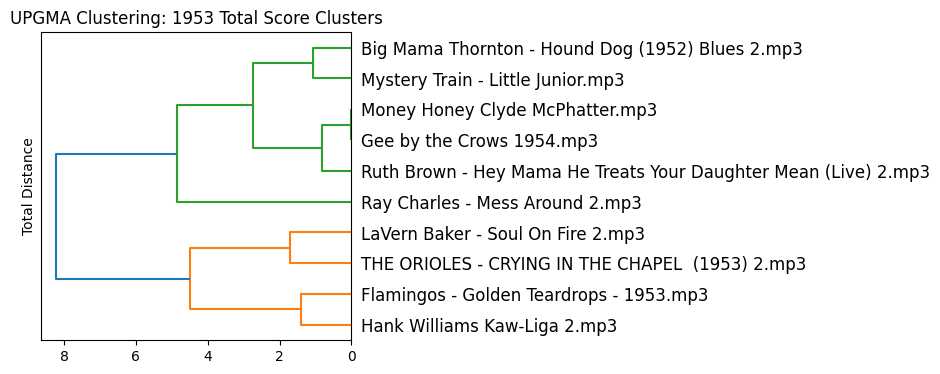

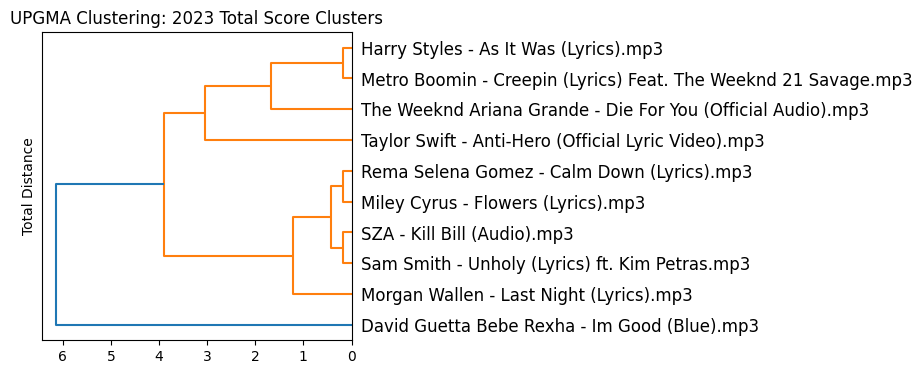

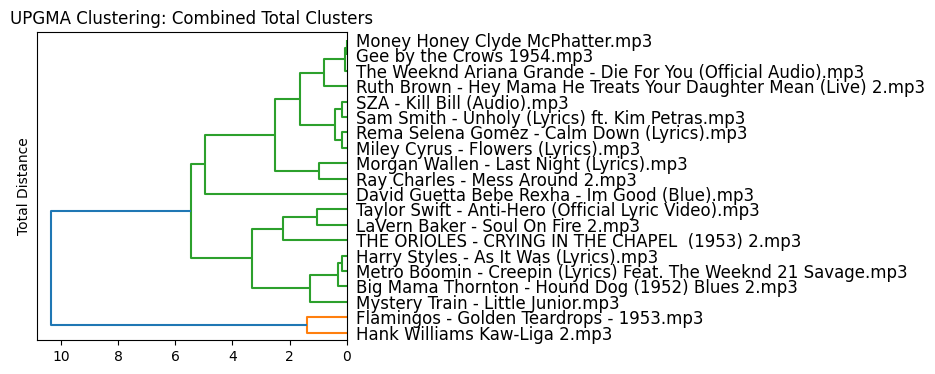

In [16]:
cluster(total_list_old, "1953 Total Score Clusters", float_distance)
cluster(total_list_new, "2023 Total Score Clusters", float_distance)

combined_total_list = total_list_old + total_list_new
cluster(combined_total_list, "Combined Total Clusters", float_distance)

The total scores reflect how complex a song is over several of different factors. The total scores take tempo, timbre, memory, and storage to create a value that represents how unique a song is. I felt like I could not include Major:Minor counts in here because that doesn't really have to do with the time period, that is more what type of song it is. Even though sentiment can be considered important in rating the total score, I did not want to include it because all of the value are too spread out from each other. It is a range from -1 to 1 and i would probably multiply this by a scalar factor and I feel like the values that are outputed from abs(lyric_sentiment)* 3 then it would strip the value of adding it to the test. The resulting number produced by the analyze_songs function will be an estimate of how complex a song is. In this situation, complex means the fastest, most unique, takes up the most storage, and is the longest duration. My data shows the old songs had a higher tempo and total score, while

Analyzing the songs:

My analyzer proved to be inaccurate. Instead of looking at the individual song files, I am going to summarize the flaws of my analyzer instead. My analyzer looks at the tempo, timbre, and GB/Duration and finds the sum and then divides by 1000000 to be an number between 1-20. This is a mistake because timbre has way more effect on the rating of the songs and also old songs lead in tempo. I need to add in weighting factors so that that tempo and timbre are regulated. I also should add more factors or do more research about how to make the analyzer more accurate. An example of the analyzer doing a poor job is it's rating on "I'm good". That song is rated at 1 because it has a really low timbre so when I divided by 1000000, it was one digit behind and got divided by a number close to it. There are some scores that the analyzer properly reflects, like
The total average of the old songs is 10.929 and the total average of the new songs is 6.66. This shows that the analyzer is not accurate, because the new songs should be more advanced than the old songs.


# Results:

In [17]:

def old_stats(music_files: Dict[str, Tuple[np.ndarray, float]], total_scores: Dict[str, float], 
              lyric_sentiments: List[Tuple[str, float]], dir_path: str):
    
    data = []
    
    for (file, (audio_data, sr)), (filename, sentiment_score) in zip(music_files.items(), lyric_sentiments):
        file_data = []
        
        # File name
        file_data.append(file)
        
        # Tempo
        tempo = librosa.beat.tempo(y=audio_data, sr=sr)[0]
        file_data.append(round(tempo, 2))
        
        # Timbre (MFCC)
        timbre = librosa.feature.mfcc(y=audio_data, sr=sr)
        coefficient_count = timbre.shape[1]
        file_data.append(coefficient_count)
        
        # Major:Minor
        major_count, minor_count, ratio = major_minor_count(audio_data, sr)
        file_data.append(f"{major_count/minor_count}")
        
        # Lyric Sentiment
        file_data.append(sentiment_score)
        
        # Memory (Duration)
        duration = len(audio_data) / sr  
        file_data.append(round(duration, 2))
        
        # Storage
        full_path = os.path.join(dir_path, file)
        file_size = os.path.getsize(full_path)  
        storage = file_size / (1024 * 1024)  # scale factor from B to MB
        file_data.append(round(storage, 2))
        
        # Overall Score
        overall_score = total_scores.get(file, 0)  
        file_data.append(overall_score)
        
        data.append(file_data)
        
    show_markdown_table(['File', 'Tempo (BPM)', 'Timbre (MFCC)', 'Major:Minor', 'Lyric Sentiment', 'Memory (Duration)', 'Storage (MB)', 'Overall Score'], data)

total_scores_old = {filename: total for filename, total in total_list_old}
total_scores_new = {filename: total for filename, total in total_list_new}

old_stats(musicOld, total_scores_old, lyric_sentiments_old, dirOldAud)

/tmp/ipykernel_17/376216708.py:13: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=audio_data, sr=sr)[0]


| File | Tempo (BPM) | Timbre (MFCC) | Major:Minor | Lyric Sentiment | Memory (Duration) | Storage (MB) | Overall Score |
| ---: | ----------: | ------------: | ----------: | --------------: | ----------------: | -----------: | ------------: |
| Ruth Brown - Hey Mama He Treats Your Daughter Mean (Live) 2.mp3 | 172.27 | 5212 | 0.9710982658959537 | 0.1744212962962963 | 121.0 | 2.77 | 6.82 |
| Mystery Train - Little Junior.mp3 | 95.7 | 6247 | 1.119047619047619 | 0.5 | 145.03 | 3.32 | 10.63 |
| THE ORIOLES - CRYING IN THE CHAPEL  (1953) 2.mp3 | 123.05 | 7942 | 1.488888888888889 | 0.05104166666666667 | 184.39 | 4.22 | 14.46 |
| Big Mama Thornton - Hound Dog (1952) Blues 2.mp3 | 143.55 | 7336 | 1.13903743315508 | 0.31665223665223674 | 170.32 | 2.6 | 9.55 |
| Ray Charles - Mess Around 2.mp3 | 152.0 | 7003 | 1.2588235294117647 | -0.14805555555555555 | 162.6 | 2.48 | 3.59 |
| Hank Williams Kaw-Liga 2.mp3 | 112.35 | 7106 | 1.90625 | 0.14875992063492063 | 164.98 | 3.78 | 18.81 |
| Gee by the Crows 1954.mp3 | 161.5 | 5756 | 1.0289017341040463 | -0.3595588235294117 | 133.63 | 3.06 | 7.63 |
| LaVern Baker - Soul On Fire 2.mp3 | 107.67 | 7891 | 0.8373493975903614 | -0.13787878787878785 | 183.21 | 4.19 | 12.76 |
| Flamingos - Golden Teardrops - 1953.mp3 | 129.2 | 8564 | 0.9294871794871795 | -0.12476190476190475 | 198.84 | 4.55 | 17.41 |
| Money Honey Clyde McPhatter.mp3 | 123.05 | 7632 | 1.3246753246753247 | -0.08235294117647059 | 177.19 | 4.06 | 7.63 |


In [18]:
old_stats(musicNew, total_scores_new, lyric_sentiments_new,dirNewAud)

/tmp/ipykernel_17/376216708.py:13: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=audio_data, sr=sr)[0]


| File | Tempo (BPM) | Timbre (MFCC) | Major:Minor | Lyric Sentiment | Memory (Duration) | Storage (MB) | Overall Score |
| ---: | ----------: | ------------: | ----------: | --------------: | ----------------: | -----------: | ------------: |
| Sam Smith - Unholy (Lyrics) ft. Kim Petras.mp3 | 129.2 | 6720 | 1.1830065359477124 | 0.5011904761904761 | 156.03 | 3.57 | 5.66 |
| Miley Cyrus - Flowers (Lyrics).mp3 | 117.45 | 8517 | 1.1828571428571428 | 0.20947966507177032 | 197.74 | 4.53 | 6.08 |
| Metro Boomin - Creepin (Lyrics) Feat. The Weeknd 21 Savage.mp3 | 99.38 | 9563 | 0.9285714285714286 | 0.12375478927203064 | 222.03 | 5.08 | 9.15 |
| Rema Selena Gomez - Calm Down (Lyrics).mp3 | 143.55 | 10178 | 1.1944444444444444 | 0.21171874999999998 | 236.32 | 5.41 | 5.91 |
| Harry Styles - As It Was (Lyrics).mp3 | 172.27 | 7041 | 0.91701244813278 | 0.11588541666666669 | 163.47 | 3.74 | 9.32 |
| Taylor Swift - Anti-Hero (Official Lyric Video).mp3 | 95.7 | 8772 | 1.4488188976377954 | 0.046473214285714284 | 203.66 | 4.66 | 11.72 |
| SZA - Kill Bill (Audio).mp3 | 89.1 | 6698 | 1.2989690721649485 | 0.05384615384615384 | 155.5 | 3.56 | 5.49 |
| Morgan Wallen - Last Night (Lyrics).mp3 | 103.36 | 7063 | 2.788732394366197 | 0.48599439775910364 | 163.99 | 3.75 | 4.56 |
| The Weeknd Ariana Grande - Die For You (Official Audio).mp3 | 136.0 | 10032 | 0.6217948717948718 | 0.0393939393939394 | 232.92 | 5.33 | 7.57 |
| David Guetta Bebe Rexha - Im Good (Blue).mp3 | 129.2 | 7605 | 1.5314685314685315 | 0.13088972431077694 | 176.56 | 4.04 | 1.14 |


# Experiment with Pandas here

# Analysis of Results:

**Analysis:** Overall, I have found that there are some aspects of today's music that have really changed from 70 years ago, but there are also many aspects that have remained the same. I thought there would be a bigger differentiation between the music of the two time periods, but what I have found is that the style of music has changed, but the formula to create a hit song has remained the same. According to Mashable, the "methods of creating popular hits have evolved greatly, but the songs still carry the same tendencies". Through this analysis I have learned a lot about music and the trends that artists replicate for a song to be popular. I tried a couple of things when going about this project and had great success, but also has some complications. I tried to use a couple of third party libraries to stretch and explore further upon what we had learned in class. I wanted to use Google Nsync to analyze the instruments in each song. This would have been cool to see the evolution of very acoustic songs to adapt and come very electronic base. I think this would have been a really cool measurement, but once I imported it, I realized I would have to create a whole different program to create an instrument analyzer and figured it would not be the best route for my project. I also tried importing a library called Spotipy which looks at spotify data and acts almost like a more extensive librosa. It looks at playlists and gives you all of the details about the songs (tempo, timbre, artist, etc) and you can also pull recomendation for similar songs that spotify reccomends which I wanted to do. I kept finding myself returning error after error and I had no clue what was going on, so I gave up and scratched the idea of implementing Spotipy into my project. Otherwise, everything else went smoothly. My biggest takeaway from this project was even with different time periods and different ways to create songs, popular music ultimately remains very similar despite the technology, instruments, and political state of the world.

**Tempo:**

As you can see for the tempo. The average tempo was 10 BPM higher for the top 10 songs from 1953 over the top 10 songs from 2023. I was very surprised by this because I was expecting 2023 to have a higher tempo because it is more bubble gum, dance pop rather than the doo-wop pop. This kind of makes sense though because songs needed to be faster paced to sound different from other songs back in this time to make them more interesting. 

**Timbre:**

As you can see for the timbre. The average timbre was 1000 MFCC counts higher for the year 2023 than in 1953. This made complete sense to me because the technology in the music industry has improved so much over the last 70 years. Most of the top songs today have synthesizers and autotune that really push the timbre up because they will always be more unique then the basic piano. I think this was a little bit of an unfair test, but it is perfect because it hightlights the differences between the two songs. 

**Major-Minor Count:**

The major-minor is very telling about what kind of songs are in the data set because we can assume a sentiment based off of this (sad or happy). The new songs data set has a slightly higher ratio than the older songs which is very interesting. I think the newer songs are have a happier sentiment with the exception of a few songs. 

**Lyric Sentiment:**

As you can see for the lyric sentiment. The sentiment of the lyrics are about the same, but if you look at the words and meanings of the lyrics then there are drastic differences. The lyric sentiment average of the old music was .03 and the lyric sentiment of the new music was .19. This really shocked me because I felt like the older songs are more about love or missing someone and then the new songs are very lascivious, about cheating, and then also normal stuff. These scores are kind of skewed in my opinion because there were a few songs in 2023 that were definitely rated incorrectly. 

**Chroma:**

As you can see from the chroma that are displayed in the markdown table above, there is a lot of variation among the songs in the data set. Chroma can give good insight on how long a song is because it displays how many pitches are displayed across the duration of the song. I chose chroma because I wanted to explore Librosa and was having trouble getting other librosa functions to work that were related to sentiment, so went to chroma after. Ultimately, I don't think that this has mych insight on the difference between the the songs from 1953 and 2023.

**Memory and Duration:**

As you can see for the memory and duration. The average duration of the songs in 2023 are about 30 seconds longer than the songs in 1953. The average memory of the songs in 2023 is about a whole megabites more than the songs in 1953. This is exacty what I expected because the songs in 1953 were kept on record, so they tended to be made shorter so the record studios could get as many songs on each record. On the other hand, the digitization of music has allowed artists and producers to create longer songs because song storage does not really matter any more. All of the storages of the songs positively correlated to the duration of the songs, with one exception. Big Mama Thornton's "Hound Dog" is 2.73 MB in storage and 170 seconds long, which is very peculiar. The storage should be way higher for a song that almost lasts 3 minutes long, so I don't know if this was a mistake or they used something to compress the file, but this is very interesting.



**Total Scores:**

As you can see for the total scores, this was not the most efficient analyzer. My old songs were rated as more complex than the newer songs. This is because there were a few outliers for timbre in the old data set (Kaw-Liga) that really brought the average up to make old songs more complex. If I removed the outliers from the data set, then new songs would be more complex. I added a scalor factor of 10000000 to bring the digit down to something between 1-20 and this was not the smartest decision because it meant that timbre had an insane weight over the other factors. I want to change this to have weighting for each of the elements (30% for timbre, 30% for tempo, etc.) I should have  Now looking at my code, I need to adjust my scalar factors to be on the individual elements rather than dividing the total by a single value. 


# Sources

Librosa: 

https://librosa.org/doc/latest/index.html 

How pop music has changed: 

https://open.lib.umn.edu/mediaandculture/chapter/6-2-the-evolution-of-popular-music/#:~:text=Popular%20music%20diversified%20in%20the,into%20the%201990s%20and%202000s 

Python Libraries and syntax: 

https://docs.python.org/3/ 

Science behind popular music: 

https://epjdatascience.springeropen.com/articles/10.1140/epjds/s13688-023-00377-7 

What elements make a pop song popular: 

https://mashable.com/ad/feature/science-of-pop-music 

What is tempo?:

https://www.masterclass.com/articles/how-to-find-the-bpm-of-a-song# 
